In [2]:
# Her zamankinden
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Grafikleri daha hoş ve büyük yap
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)


# Bu kısım pandas 0.12 de çok sayıda sütun göstermek için gerekli.
# pandas 0.13 te gerekli değil
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

/home/sinanonur/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


Bisiklet yolları veri kümemize geri dönelim. Acaba Montreal bisikleti daha çok ulaşım için mi yoksa eğlence amaçlı mı kullanıyor. İnsanlar hafta içi mi hafta sonu mu daha fazla bisiklet sürüyor?

# 4.1 Dataframe'e 'weekday' (hafta içi)sütunu eklemek

Daha önce yaptığımız gibi önce veriyi yükleyelim.

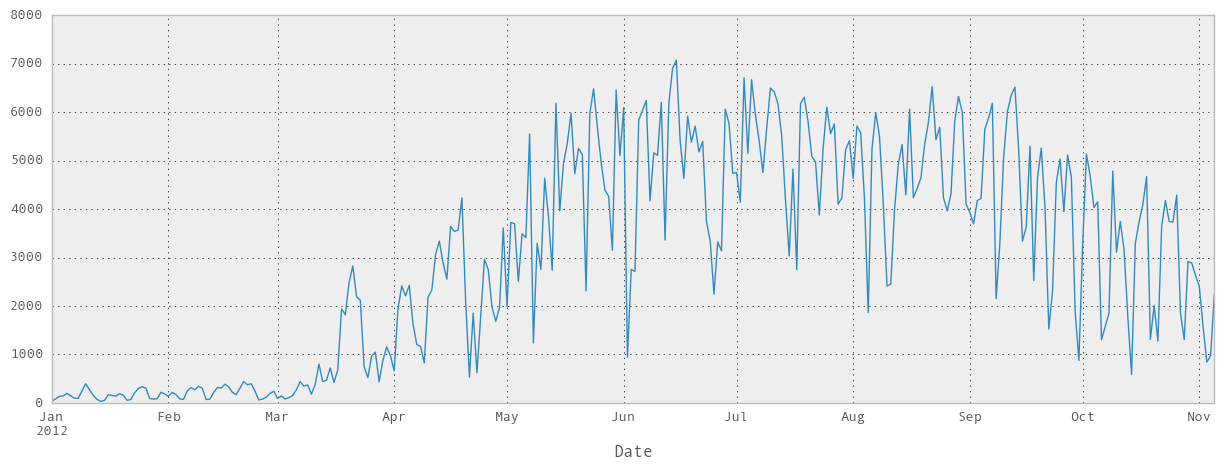

In [3]:
bikes = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
bikes['Berri 1'].plot()

Şimdi Berri bisiklet yoluna bakacağız. Berri Montrealde bir sokaktır ve oldukça önemli bir bisiklet yoludur.

İçinde sadece Berri olan bir dataframe yaratalım.e Berri bikepath in it

In [4]:
berri_bikes = bikes[['Berri 1']].copy()

In [5]:
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


Şimdi bir 'weekday' sütunu yaratalım. Öncelikle bunu indexten alabiliriz. Daha öcne indexlerden bahsetmedik ama index dataframe'in solunda 'Date'in altında yer alan kısımdır. İçinde senenin bütün günleri vardır.

In [12]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30', '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03', '2012-11-04', '2012-11-05'], dtype='datetime64[ns]', name=u'Date', length=310, freq=None)

In [13]:
len(berri_bikes.index)

310

Gördüğünüz üzere bazı günler eksik. Yılın sadece 310 günü veride var. Kim bilir neden?

Pandas'ın bir sürü harika zaman serisi(time series) özelliği vardır. Eğer  her satır için gün bilgisini almak istersek şu şekilde yapabiliriz:

In [14]:
berri_bikes.index.day

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13

Ama biz aslında haftanın günlerini istiyoruz:

In [15]:
berri_bikes.index.weekday

array([6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5,

Bunlar 0 Pazartesi olmak üzere haftanın günleridir. Bunu takvime bakarak bulabiliriz.hecking on a calendar.

Şimdi haftanın günlerini bulduğumuza göre bunu dataframe'e şöyle ekleyebiliriz:

In [16]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


# 4.2 Hafta içi bisikletmilerini eklemek

Oldukça kolay!

Dataframeslerin SQL'dekine benzer şekilde `.groupby()` methodu vardır.Daha fazla bilgi için, [ilgili dökümantasyon](http://pandas.pydata.org/pandas-docs/stable/groupby.html) oldukça iyidir..

Bu durumda, `berri_bikes.groupby('weekday').aggregate(sum)` "satırları haftanın günlerine göre grupla ve aynı gündeki sayıları topla" demektir.

In [17]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


0, 1, 2, 3, 4, 5, 6 nın ne demek olduğunu hatırlamak güç olduğundan bunu düzeltip grafiği çizebiliriz.

In [18]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


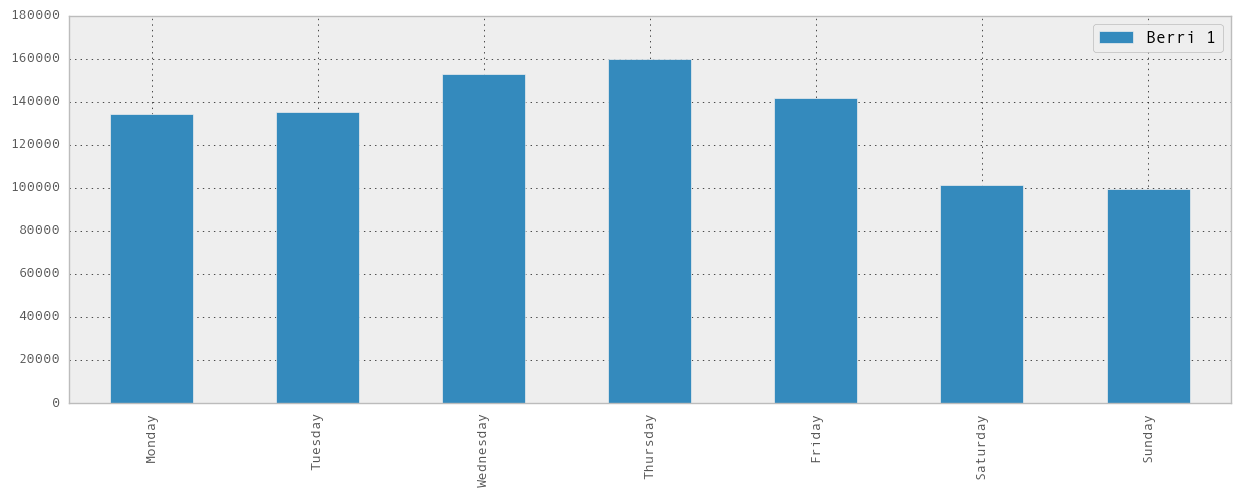

In [19]:
weekday_counts.plot(kind='bar')

Görünüşe göre Montrealliler daha çok ulaşım için bisiklet kullanıyor. Güzel!

# 4.3 Hepsini bir araya getirmek

Ne kadar kolay olduğunu ispatlamak için hepsini 6 satır sihirli pandas ile bir araya getirelim.

Eğer oyamak isterseniz `sum` ı `max`, `numpy.median` a ya da istediğiniz herhangi bir fonksiyona çevirebilirsiniz.

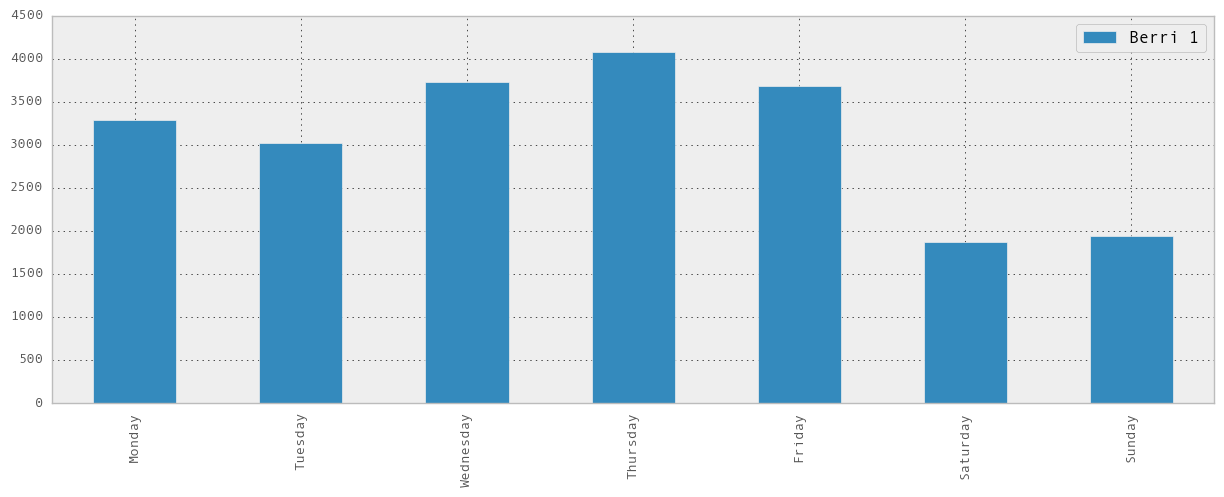

In [22]:
bikes = pd.read_csv('../data/bikes.csv', 
                    sep=';', encoding='latin1', 
                    parse_dates=['Date'], dayfirst=True, 
                    index_col='Date')
# Add the weekday column
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday

# Add up the number of cyclists by weekday, and plot!
weekday_counts = berri_bikes.groupby('weekday').aggregate(np.median)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')